In [22]:
import numpy as np
import pandas as pd
from scipy.stats import uniform, binom
import seaborn as sns
import matplotlib.pyplot as plt

### Towards grid approximation

Congratulations! You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the percentage of patients cured by the drug.

An experiment was quickly set up in which 10 sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.

numpy and pandas have been imported for you as np and pd, respectively.

##### Instructions

- Using np.arange(), create an array of all possible numbers of patients cured (from 0 to 10) and assign it to num_patients_cured.
- Using np.arange(), create an array of all possible values for the efficacy rate (from 0 to 1, by 0.01) and assign it to efficacy_rate.
- Combine num_patients_cured and efficacy_rate into a DataFrame called df, listing all possible combinations of the two.
- Assign ["num_patients_cured", "efficacy_rate"] to df's columns and print it.

In [6]:
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0, 11, 1)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0, 1.01, 0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ["num_patients_cured", "efficacy_rate"]

# Print df
print(df)

      num_patients_cured  efficacy_rate
0                      0           0.00
1                      0           0.01
2                      0           0.02
3                      0           0.03
4                      0           0.04
...                  ...            ...
1106                  10           0.96
1107                  10           0.97
1108                  10           0.98
1109                  10           0.99
1110                  10           1.00

[1111 rows x 2 columns]


##### Grid approximation without prior knowledge

According to the experiment's outcomes, out of 10 sick patients treated with the drug, 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? Assume you have no prior knowledge whatsoever regarding how good the drug is.

A DataFrame df with all possible combinations of the number of patients cured and the efficacy rate which you created in the previous exercise is available in the workspace.

uniform and binom have been imported for you from scipy.stats. Also, pandas and seaborn are imported as pd and sns, respectively.

##### Instructions 1/4
- Calculate a uniform prior for efficacy_rate using uniform.pdf() and assign it as a new column to df.
- Calculate the binomial likelihood using binom.pmf() by passing the number of "successes", the total number of observations, and the "probability of success", and assign the result as a new column to df

In [8]:
# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])

##### Instructions 2/4
- Calculate the posterior probability for efficacy rate, assign it to a new column called posterior_prob in df, and scale it so that it sums up to 1.

In [15]:
# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()

##### Instructions 3/4
- Filter df to keep only rows where the number of patients cured is 9, assign the result to df_9_of_10_cured, and scale the posterior_prob so that it sums up to 1.

In [19]:
# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

C:\Users\dimweb\AppData\Local\Temp\ipykernel_23340\4035443208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()


##### Instructions 4/4
- Plot the drug's posterior efficacy rate having seen 9 out of 10 patients cured.

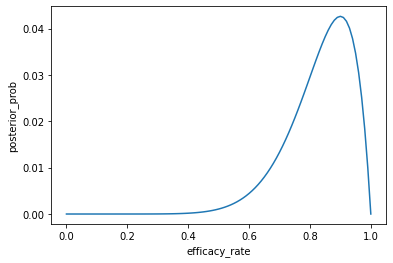

In [24]:
# Plot the drug's posterior efficacy rate
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], y=df_9_of_10_cured["posterior_prob"])
plt.show()

### Updating posterior belief

Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data!

This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!

The DataFrame you created in the previous exercise, df, is available in the workspace and binom has been imported for you from scipy.stats.

##### Instructions 1/4

- Assign posterior_prob from df to a new column called new_prior.

- Calculate the new_likelihood using binom.pmf() based on the new data and assign it as a new column to df.

In [25]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df['posterior_prob']
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

##### Instructions 2/4
- Calculate the new_posterior_prob using new_prior and new_likelihood, assign it as a new column to df, and scale it by its sum.

In [26]:
# Calculate new posterior and scale it
df["new_posterior_prob"] = df['new_prior'] * df['new_likelihood']
df["new_posterior_prob"] /= df["new_posterior_prob"].sum() 

##### Instructions 3/4
- Filter df to keep only rows with 10 cured patients, assign the result to df_10_of_12_cured, and scale the new_posterior_prob so that it sums up to 1.

In [27]:
# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df['num_patients_cured'] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured['new_posterior_prob'].sum()

C:\Users\dimweb\AppData\Local\Temp\ipykernel_23340\920825871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured['new_posterior_prob'].sum()


##### Instructions 4/4

We have two posterior distributions for the efficacy rate now:

The one from the previous exercise (without prior knowledge, after seeing 9 out of 10 patients cured) which you have used as a new prior in this exercise.
The updated one you have just calculated (after seeing another 10 out of 12 patients cured).
You can plot them on top of each other using the following code chunk:
```python
sns.lineplot(df_10_of_12_cured["efficacy_rate"], 
             df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(df_9_of_10_cured["efficacy_rate"], 
             df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")
plt.show()
```

Based on the plot, which of the following statements is false?

d:\programming\AI\ai_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\programming\AI\ai_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


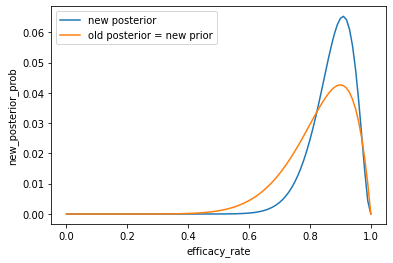

In [28]:
sns.lineplot(df_10_of_12_cured["efficacy_rate"], 
             df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(df_9_of_10_cured["efficacy_rate"], 
             df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")
plt.show()

##### This is true
- The new posterior is higher and narrower than the old one, which means there is less uncertainty in the estimation. With more data, the posteriors usually get higher and narrower, indicating a more confident estimation.
- Adding the data on the new 12 patients increase our estimate of the drug's effectiveness against the virus. Compare the new posterior that includes these new data with the old one: the former peaks slightly more to the right, and estimates lower efficacy rates between 60% and 80% as less likely.

##### This is false
The difference between these two distributions actually reflects what we have learned only from the data on the 12 new patients. The knowledge about the first 10 patients is already encoded in the old posterior, which became the new prior.